# Antiguedad promedio por provincia

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [23]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

In [24]:
dfa = df.loc[(~df['provincia'].isnull()) & (~df['antiguedad'].isnull()) & (df['antiguedad'] > 0)].copy()
datos = dfa.loc[:,['provincia', 'antiguedad']].copy()
datos.head(10)

,provincia,antiguedad
1,Distrito Federal,10
2,Jalisco,5
3,Edo. de México,1
4,Jalisco,10
5,Distrito Federal,5
7,Quintana Roo,2
8,Colima,1
13,Distrito Federal,20
17,Distrito Federal,5
23,Quintana Roo,4


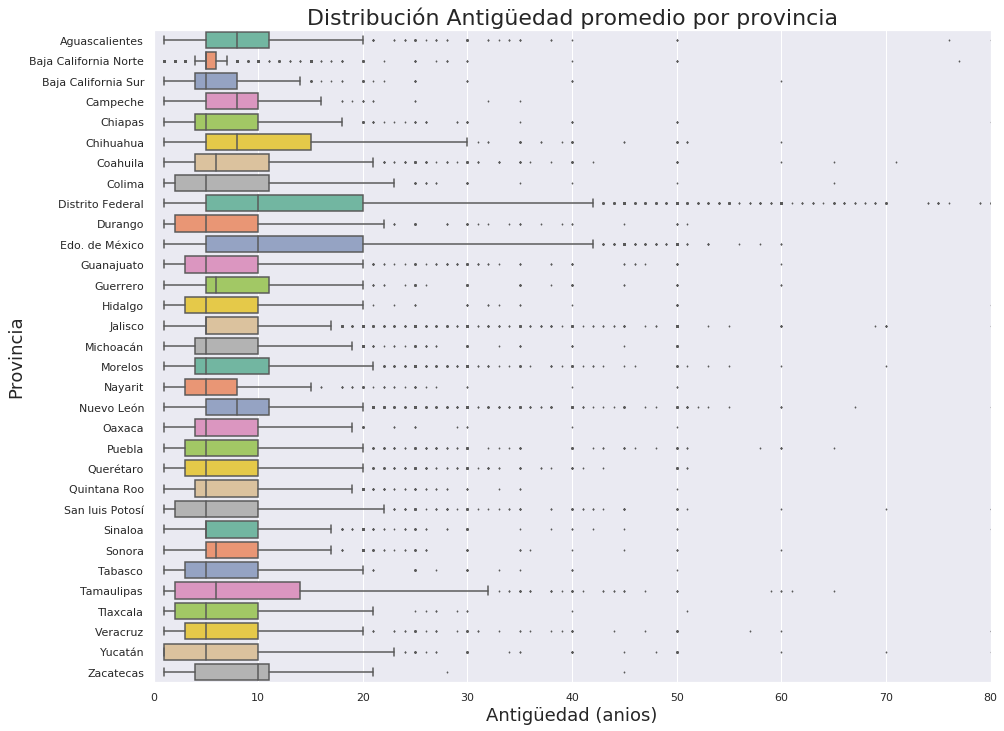

In [25]:
plt.figure(figsize=(15, 12))
plt.ticklabel_format(style='plain')
sns.set(style="whitegrid")
g = sns.boxplot(y=datos['provincia'], x=datos['antiguedad'],fliersize=1,palette='Set2')
g.set_title("Distribución Antigüedad promedio por provincia", fontsize=22)
g.set_xlabel("Antigüedad (anios)",fontsize=18)
g.set_ylabel("Provincia", fontsize=18)
g.set_xlim((0,80))
g.figure.savefig("boxplotAntiguedadProvincia.png",bbox_inches='tight')
